In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from sklearn.decomposition import PCA

In [3]:
typedic={0:'round-ellip',1:'inbetween-ellip',2:'cigar-ellip',3:'edgeon-spiral',4:'barred-spiral',5:'unbarred-spiral',6:'irregular',7:'merger'}
# colordic={'round-ellip':'#e0a1f0','inbetween-ellip':"#e66ca2",'Cigar-ellip':'#ffb3c6',
#           'edgeon-spiral':'#00d5ff','barred-spiral':'#0090FE','unbarred-spiral':'#0018ba',
#           'irregular':'#b0b0b0','merger':'#009125'}
colordic={'round-ellip':'#24d0f2','inbetween-ellip':"#0090FE",'cigar-ellip':'#0018ba',
          'edgeon-spiral':'#e0a1f0','barred-spiral':'#e66ca2','unbarred-spiral':'#ffb3c6',
          'irregular':'#6e6e6e','merger':'#b6d90b'}
hueorder=['edgeon-spiral','barred-spiral','unbarred-spiral','round-ellip','inbetween-ellip','cigar-ellip','merger','irregular']
meta=pd.read_csv('/cndd2/jchien/project/transformer/gz2_predictions_new.csv.gz')
meta.head()

GalaxyID  class  pred_vit  pred_res  vitTresT  vitTresF  vitFresT  \
0        17      0         0         0         1         0         0   
1        20      1         1         1         1         0         0   
2        24      3         3         3         1         0         0   
3        36      5         7         7         0         0         0   
4        49      3         3         3         1         0         0   

   vitFresF            dr7objid    dered_u  ...  modelMag_z     lnLDeV_r  \
0         0  587722981742084303  19.673649  ...   15.693376  -116.616010   
1         0  587722981742215305  18.132294  ...   15.669191   -15.639699   
2         0  587722981743067266  19.062454  ...   15.943096  -254.417700   
3         1  587722981744115851  20.079730  ...   16.134436  -171.511660   
4         0  587722981745295552  17.256195  ...   14.406494 -4681.504400   

     lnLExp_r  petroR50_r  petroR90_r  dered_g_r  model_g_r  viewed_edge_on  \
0 -2148.49630    3.208182    9.783567   1.127535   1.157339        0.000000   
1 -1587.02050    2.254702    6.496093   0.649712   0.679811        0.000000   
2  -378.97885    2.058299    5.655466   0.794344   0.822649        0.884189   
3 -1629.12650    3.177179    9.275770   1.274666   1.298849        0.000000   
4 -1925.91130    9.300726   22.432047   0.723113   0.748410        0.947000   

   anything_odd  viteqres  
0      0.000000         1  
1      0.000000         1  
2      0.000000         1  
3      0.813391         1  
4      0.120000         1  

[5 rows x 28 columns]

In [4]:
# meta=pd.read_csv('/cndd2/jchien/project/transformer/gz2_predictions.csv')
# df=pd.read_csv('/cndd2/jchien/project/transformer/gz2_hug_vit_121221C_predictions.csv')
# tt=pd.merge(meta,df[['GalaxyID','pred']],on='GalaxyID')
# tt['pred_vit']=tt['pred']
# tt['vitTresT']=0
# tt['vitTresF']=0
# tt['vitFresT']=0
# tt['vitFresF']=0
# tt['viteqres']=0
# tt.loc[(tt['pred_vit']==tt['class'])&(tt['pred_res']==tt['class']), "vitTresT"] = 1
# tt.loc[(tt['pred_vit']==tt['class'])&(tt['pred_res']!=tt['class']), "vitTresF"] = 1
# tt.loc[(tt['pred_vit']!=tt['class'])&(tt['pred_res']==tt['class']), "vitFresT"] = 1
# tt.loc[(tt['pred_vit']!=tt['class'])&(tt['pred_res']!=tt['class']), "vitFresF"] = 1
# tt.loc[(tt['pred_vit']==tt['pred_res']), "viteqres"] = 1
# tt=tt.drop(columns='pred')
# tt
# tt.to_csv('/cndd2/jchien/project/transformer/gz2_predictions_new.csv',index=None)

## VIT Train

In [ ]:
# # # UMAP
# df=pd.read_csv('/cndd2/jchien/project/transformer/vit_base_train_f768.csv.gz')
# df=df.sample(n=31191, random_state=2021)
# label=df['label']
# data=df.drop(columns=['galaxy_id','label']).values
# embedding = umap.UMAP(n_neighbors=10,n_components=2, metric='euclidean').fit_transform(data)
# info2=pd.DataFrame({'label': df['label'], 'umap0':embedding[:,0],'umap1':embedding[:,1]})
# info2['cluster']=info2['label'].map(typedic)
# info2.to_csv('UMAP_euclidean10_vit_base_train_f768.csv.gz')

Text(0.5, 1.0, 'vit_base_train_f768')

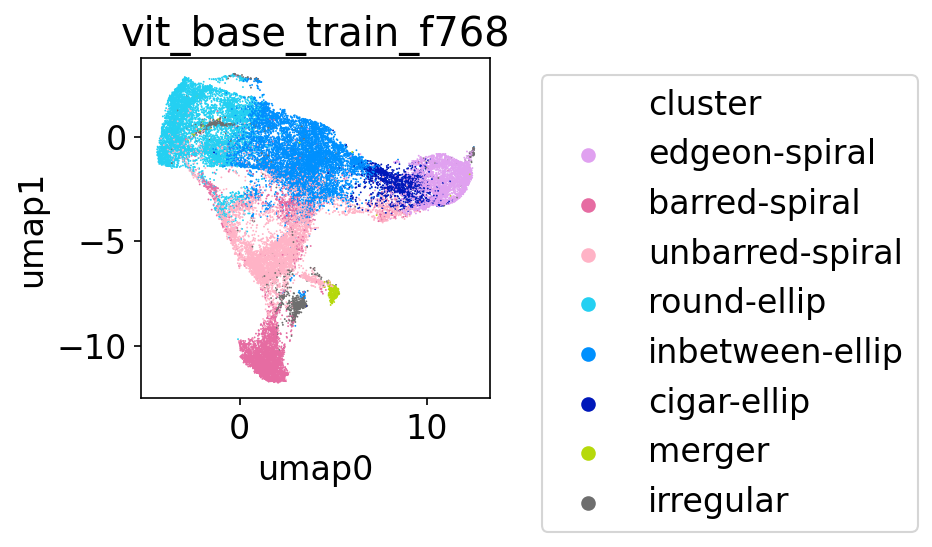

In [87]:
vit_train=pd.read_csv('UMAP_euclidean10_vit_base_train_f768.csv.gz',index_col=0)
vit_train['umap1']=-1*vit_train['umap1']
plt.figure(figsize=(3,3),dpi=150)
sns.scatterplot(x='umap0',y='umap1',data=vit_train,hue='cluster',
                hue_order=hueorder,linewidth=0,s=0.8,palette=colordic)
plt.legend(bbox_to_anchor=(1.1,1))
plt.title('vit_base_train_f768')

Text(0.5, 0.98, 'vit_base_train_f768')

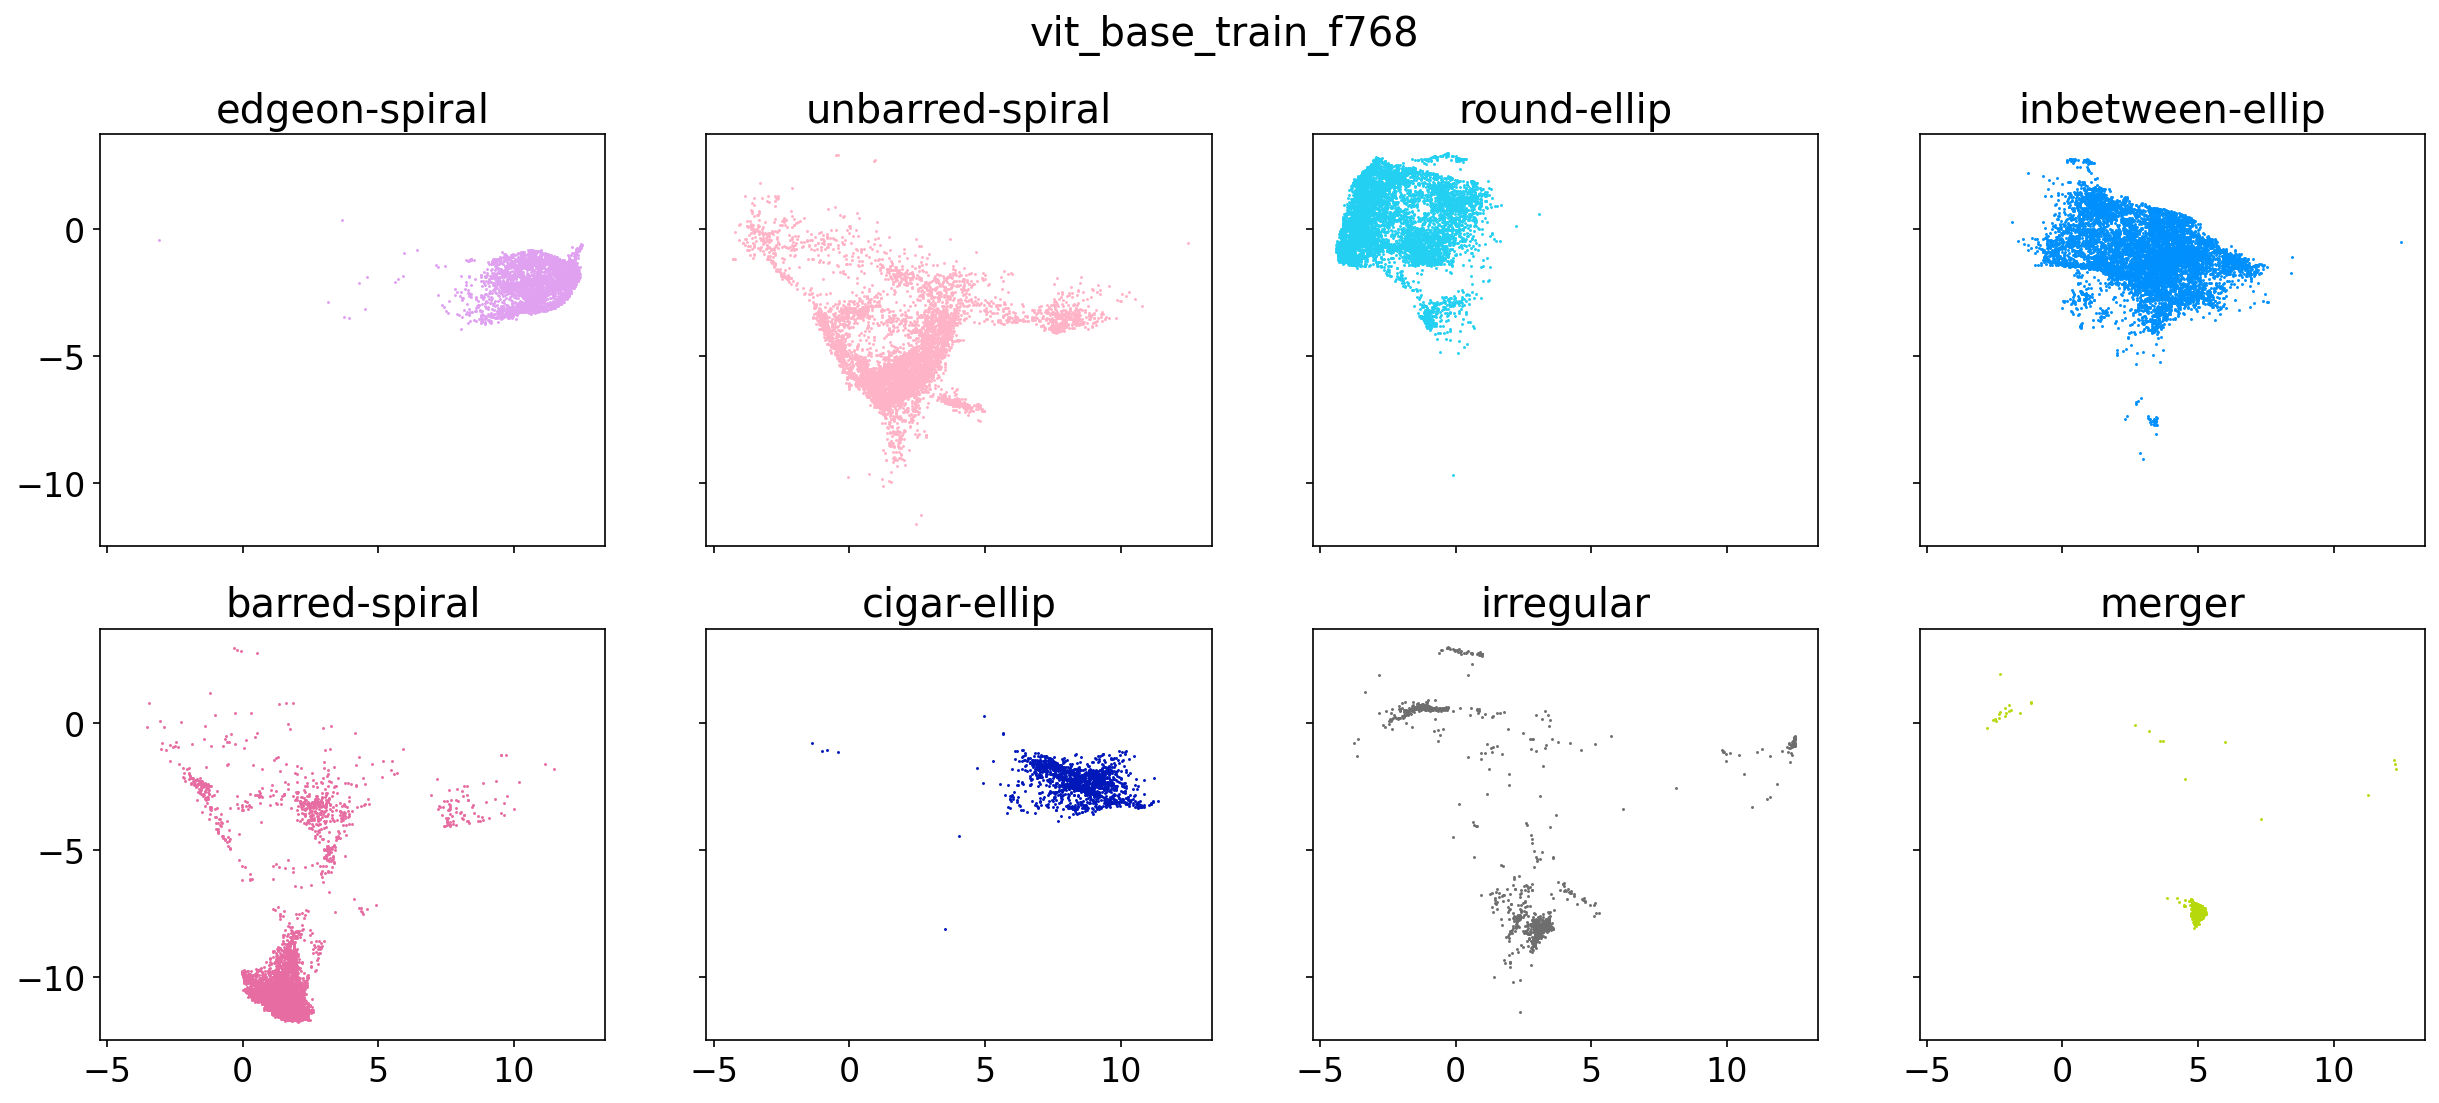

In [88]:
fig,axs=plt.subplots(2,4,figsize=(20,8),dpi=150,sharex=True,sharey=True)
for n,types in enumerate(vit_train['cluster'].unique()):
    data=vit_train[vit_train['cluster']==types]
    ax=axs[n//4,n%4]
    ax.scatter(x='umap0',y='umap1',data=data,
                    linewidth=0,s=2,c=colordic.get(types))
    ax.set_title(types)
    ax.legend([],[], frameon=False)
plt.suptitle('vit_base_train_f768')

## VIT test

In [ ]:
# # UMAP
# df=pd.read_csv('/cndd2/jchien/project/transformer/vit_base_test_f768.csv.gz')
# data=df.drop(columns=['galaxy_id','label']).values
# info=df[['galaxy_id','label']].merge(meta,left_on='galaxy_id',right_on='GalaxyID')
# info['cluster']=info['label'].map(typedic)
# embedding = umap.UMAP(n_neighbors=10,n_components=3, metric='euclidean').fit_transform(data)
# info['umap0']=embedding[:,0]
# info['umap1']=embedding[:,1]
# info['umap2']=embedding[:,2]
# info.to_csv('UMAP_euclidean10_vit_base_test_f768.csv')

([], [])

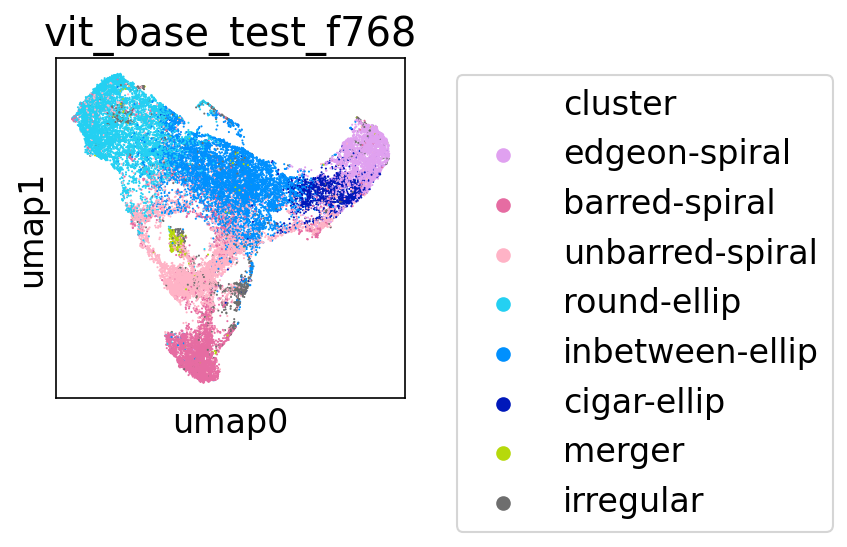

In [89]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

vit_test=pd.read_csv('UMAP_euclidean10_vit_base_test_f768.csv.gz',index_col=0)
plt.figure(figsize=(3,3),dpi=150)
sns.scatterplot(x='umap0',y='umap1',data=vit_test,hue='cluster',
                hue_order=hueorder,linewidth=0,s=1,palette=colordic)
plt.legend(bbox_to_anchor=(1.1,1))
plt.title('vit_base_test_f768')
plt.xticks([])
plt.yticks([])
# plt.savefig("vit_base_test_f768.pdf")

<IPython.core.display.Javascript object>


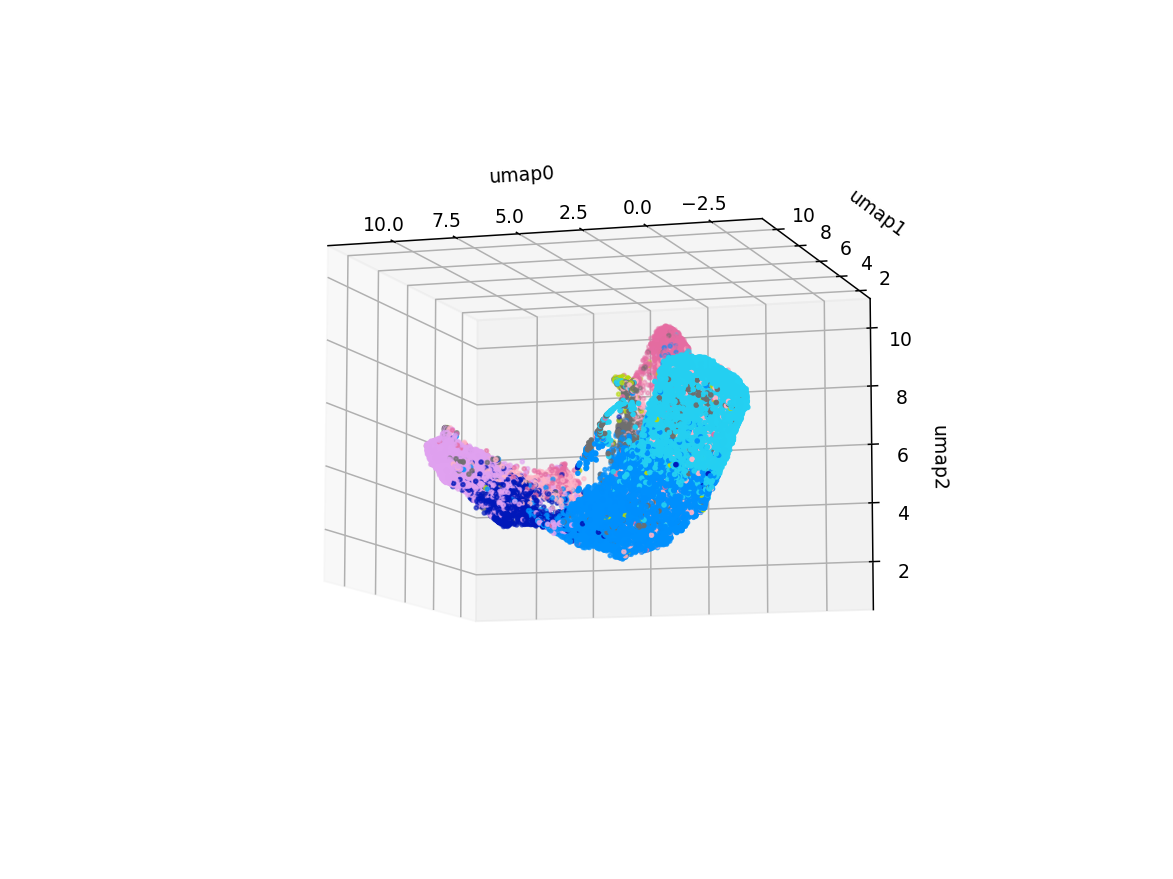

Text(0.5, 0, 'umap2')

In [7]:
%matplotlib notebook
# %matplotlib inline
df=pd.read_csv('/cndd2/jchien/project/transformer/vit_base_test_f768.csv.gz')
data=df.drop(columns=['galaxy_id','label']).values
info=df[['galaxy_id','label']].merge(meta,left_on='galaxy_id',right_on='GalaxyID')
info['cluster']=info['label'].map(typedic)
embedding = umap.UMAP(n_neighbors=10,n_components=3, metric='euclidean').fit_transform(data)
info['umap0']=embedding[:,0]
info['umap1']=embedding[:,1]
info['umap2']=embedding[:,2]

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(info['umap0'], info['umap1'], info['umap2'],c=info['cluster'].map(colordic),s=4)
ax.set_xlabel('umap0')
ax.set_ylabel('umap1')
ax.set_zlabel('umap2')

Text(0.5, 1.0, 'galaxy brightness')

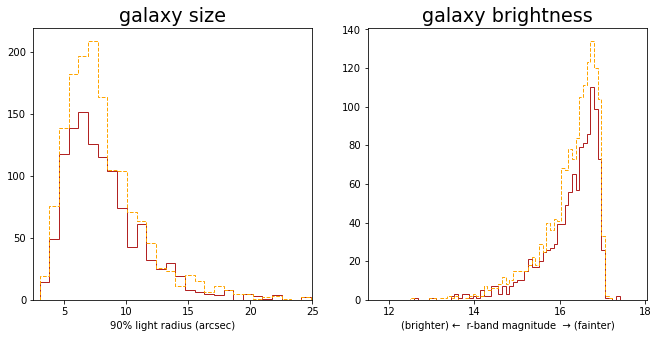

In [91]:
## hitogram from Hung-Jin
meta=pd.read_csv('/cndd2/jchien/project/transformer/gz2_predictions_new.csv.gz')
dens=False
binsize=70

%matplotlib inline
df_vTrT = meta[meta.vitTresT == 1]
df_vTrF = meta[meta.vitTresF == 1]
df_vFrT = meta[meta.vitFresT == 1]
df_vFrF = meta[meta.vitFresF == 1]
df_vT = meta[(meta.vitTresT == 1)|(meta.vitTresF == 1)]
df_rT = meta[(meta.vitTresT == 1)|(meta.vitFresT == 1)]

fig, axs = plt.subplots(1, 2, figsize=(11., 5.))
plt.rc('font', size=16)

ax=axs[0]
tag = 'petroR90_r'
bins = np.linspace(meta[tag].min(), meta[tag].max(),binsize)
if dens:
    ax.hist(meta[tag]     , bins=bins, color='lightgray'  , label='full test set', density=dens)
ax.hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{True}$  CNN $\bf{False}$', histtype='step', lw=1, density=dens)
ax.hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{False}$ CNN $\bf{True}$', histtype='step' , lw=1, ls='--', density=dens)
ax.set_xlabel('90% light radius (arcsec)')
ax.set_title('galaxy size')
ax.set_xlim(2.5, 25)

ax=axs[1]
tag = 'dered_r'
bins = np.linspace(meta[tag].min(), meta[tag].max(),binsize)

if dens:
    ax.hist(meta[tag]     , bins=bins, color='lightgray'  , label='full test set', density=dens)

ax.hist(df_vTrF[tag], bins=bins, color='firebrick'  , label=r'ViT $\bf{True}$  CNN $\bf{False}$', histtype='step', lw=1, density=dens)
ax.hist(df_vFrT[tag], bins=bins, color='orange'     , label=r'ViT $\bf{False}$ CNN $\bf{True}$', histtype='step' , lw=1, ls='--', density=dens)
ax.set_xlabel('(brighter) ←  r-band magnitude  → (fainter)')
ax.set_title('galaxy brightness')

In [75]:
print('size:','vTrF ',df_vTrF['petroR90_r'].mean(),'vFrT ',df_vFrT['petroR90_r'].mean())
print('brightness:','vTrF ',df_vTrF['dered_r'].mean(),'vFrT ',df_vFrT['dered_r'].mean())

size: vTrF  8.329155302519547 vFrT  8.187049201253298
brightness: vTrF  16.227574223718502 vFrT  16.235670075197888


In [76]:
print('size:','vTrF ',df_vTrF['petroR90_r'].median(),'vFrT ',df_vFrT['petroR90_r'].median())
print('brightness:','vTrF ',df_vTrF['dered_r'].median(),'vFrT ',df_vFrT['dered_r'].median())

size: vTrF  7.560925 vFrT  7.4724332
brightness: vTrF  16.429771 vFrT  16.429006


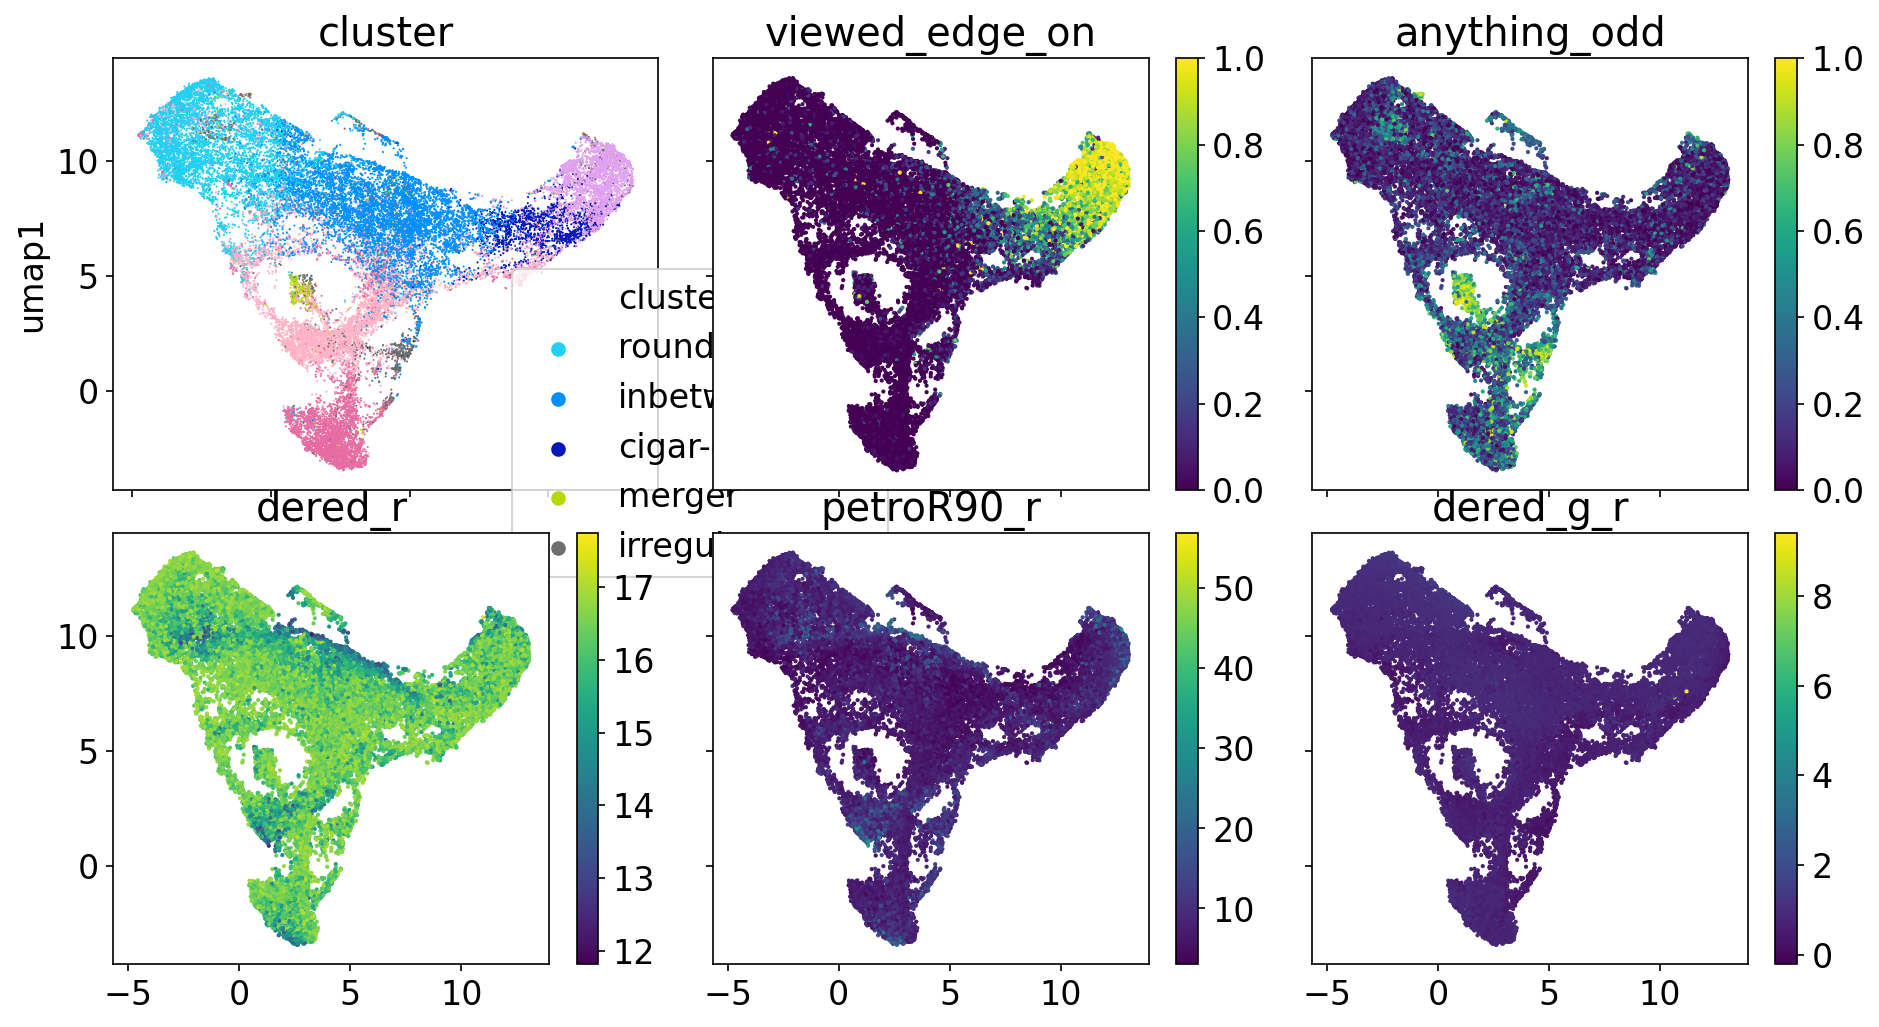

In [92]:
#dered_r:galaxy brightness ; petroR90_r: 90% light radius (arcsec)
fig,axs=plt.subplots(2,3,figsize=(15,8),dpi=150,sharex=True,sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
hues=['cluster','viewed_edge_on','anything_odd','dered_r','petroR90_r','dered_g_r'] 
n=-1
for i in range(2):
    for j in range(3):
        n=n+1
        ax=axs[i,j]
        if (i==0)&(j==0):
            vit_test['dered_r'].div(vit_test['dered_r'].max())
            sns.scatterplot(x='umap0',y='umap1',data=vit_test,hue=hues[n],ax=ax,
                            hue_order=hueorder,linewidth=0,s=1,palette=colordic, legend='full')
            ax.legend(bbox_to_anchor=(0.7, 0.55))
        else:
#             sns.scatterplot(x='umap0',y='umap1',data=info,hue=hues[n],ax=ax,s=1,edgecolor=None,palette='viridis')
            im=ax.scatter(x='umap0',y='umap1',data=vit_test,c=hues[n],s=1,edgecolor=None,cmap='viridis')
            fig.colorbar(im,ax=ax)
        ax.set_title(hues[n])
# plt.tight_layout()

Text(0.5, 0.98, 'vit_base_test_f768')

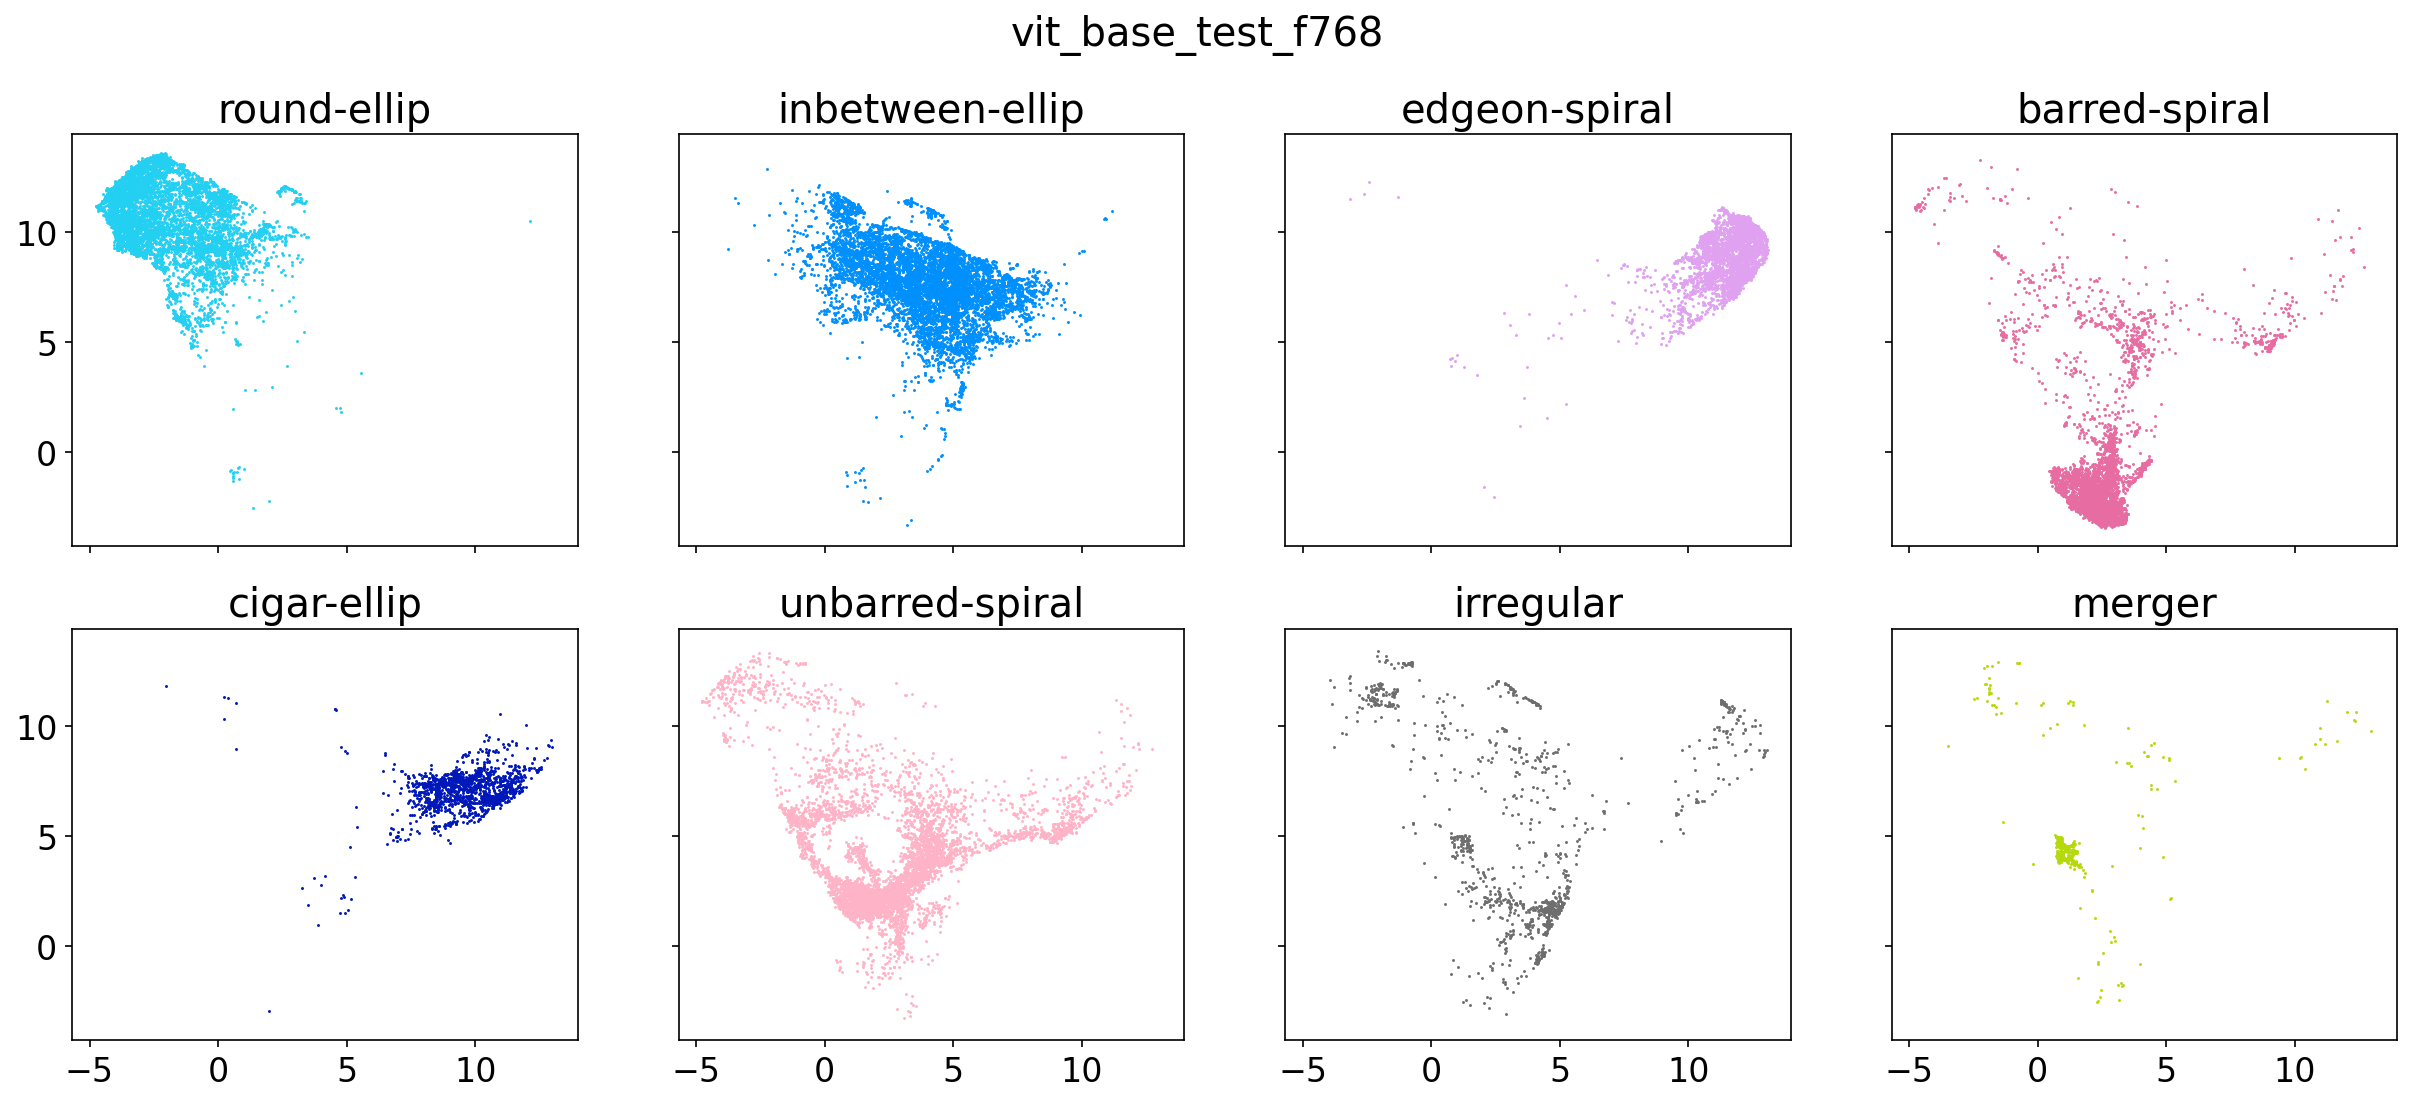

In [93]:
fig,axs=plt.subplots(2,4,figsize=(20,8),dpi=150,sharex=True,sharey=True)
for n,types in enumerate(vit_test['cluster'].unique()):
    data=vit_test[vit_test['cluster']==types]
    ax=axs[n//4,n%4]
    ax.scatter(x='umap0',y='umap1',data=data,
                    linewidth=0,s=2,c=colordic.get(types))
    ax.set_title(types)
    ax.legend([],[], frameon=False)
plt.suptitle('vit_base_test_f768')

Text(0.5, 0.98, 'vitT resT')

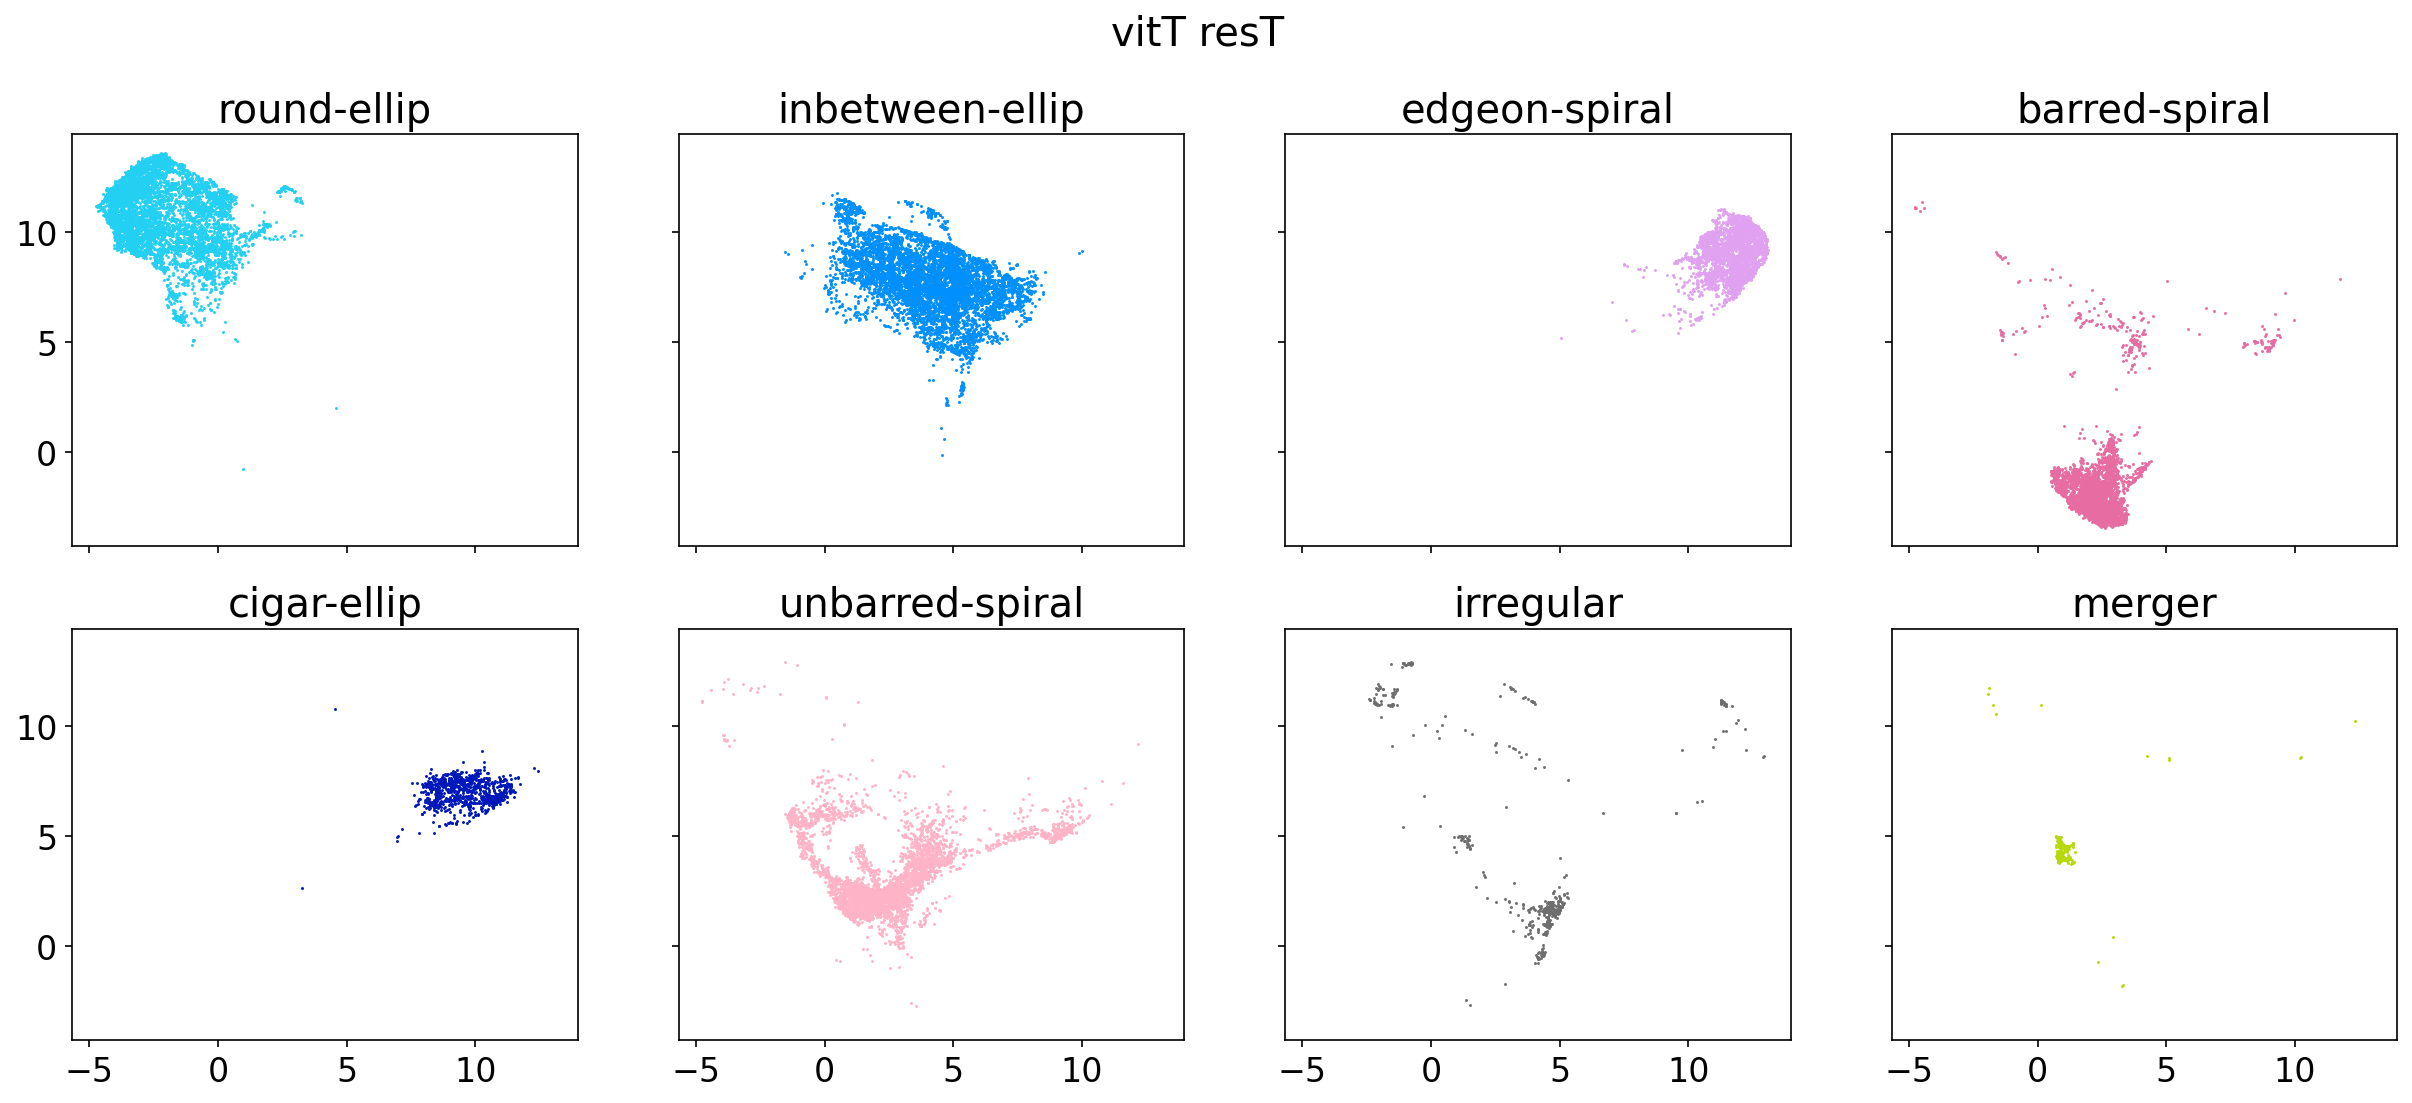

In [94]:
fig,axs=plt.subplots(2,4,figsize=(20,8),dpi=150,sharex=True,sharey=True)
for n,types in enumerate(vit_test['cluster'].unique()):
    data=vit_test[(vit_test['vitTresT']==1)&(vit_test['cluster']==types)]
    ax=axs[n//4,n%4]
    ax.scatter(x='umap0',y='umap1',data=data,
                    linewidth=0,s=2,c=colordic.get(types))
    ax.set_title(types)
    ax.legend([],[], frameon=False)
plt.suptitle('vitT resT')

Text(0.5, 0.98, 'vitF resF')

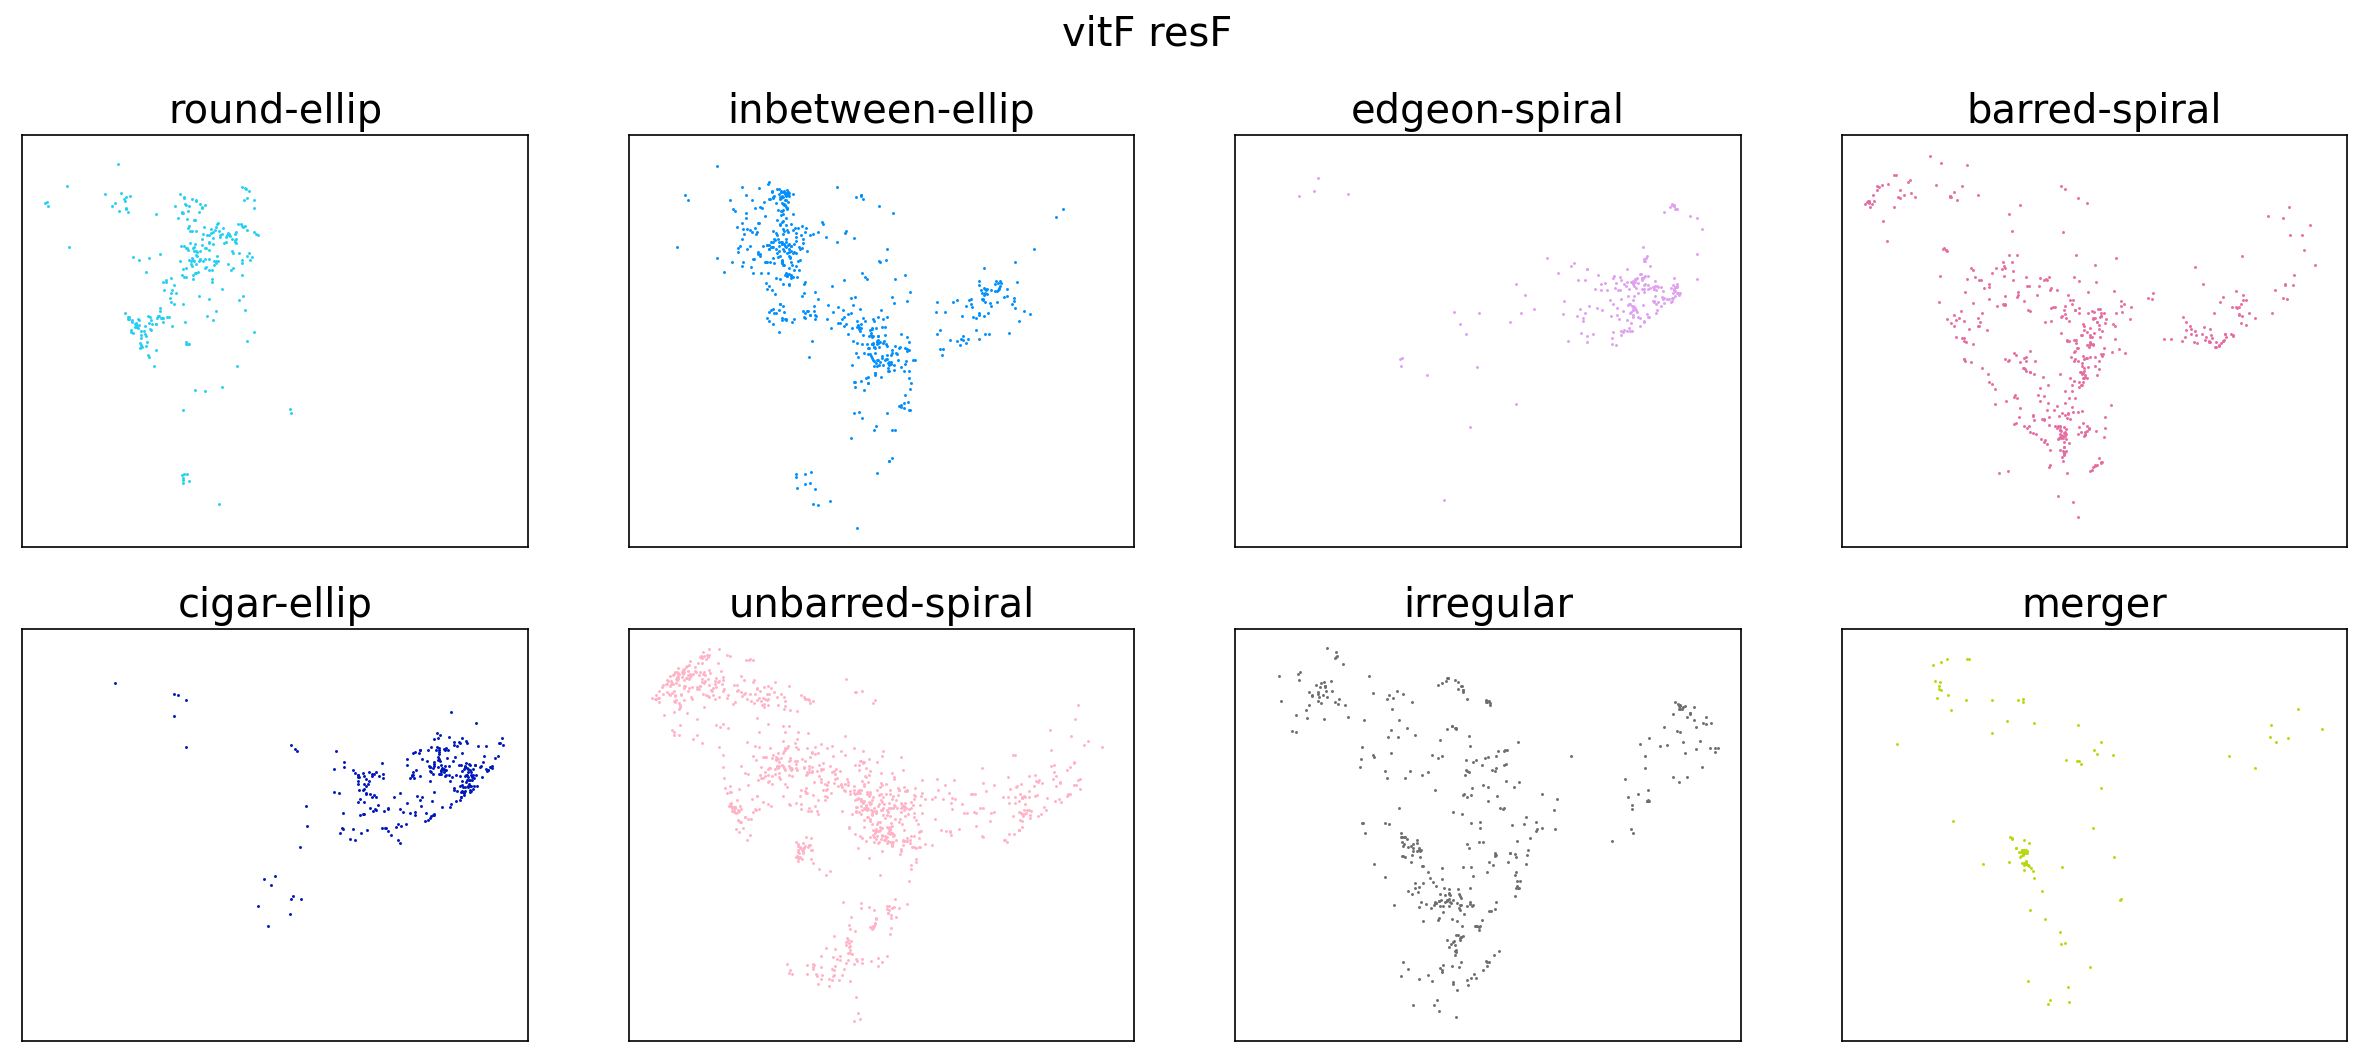

In [95]:
fig,axs=plt.subplots(2,4,figsize=(20,8),dpi=150,sharex=True,sharey=True)
for n,types in enumerate(vit_test['cluster'].unique()):
    data=vit_test[(vit_test['vitFresF']==1)&(vit_test['cluster']==types)]
    ax=axs[n//4,n%4]
    ax.scatter(x='umap0',y='umap1',data=data,
                    linewidth=0,s=2,c=colordic.get(types))
    ax.set_title(types)
    ax.legend([],[], frameon=False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle('vitF resF')

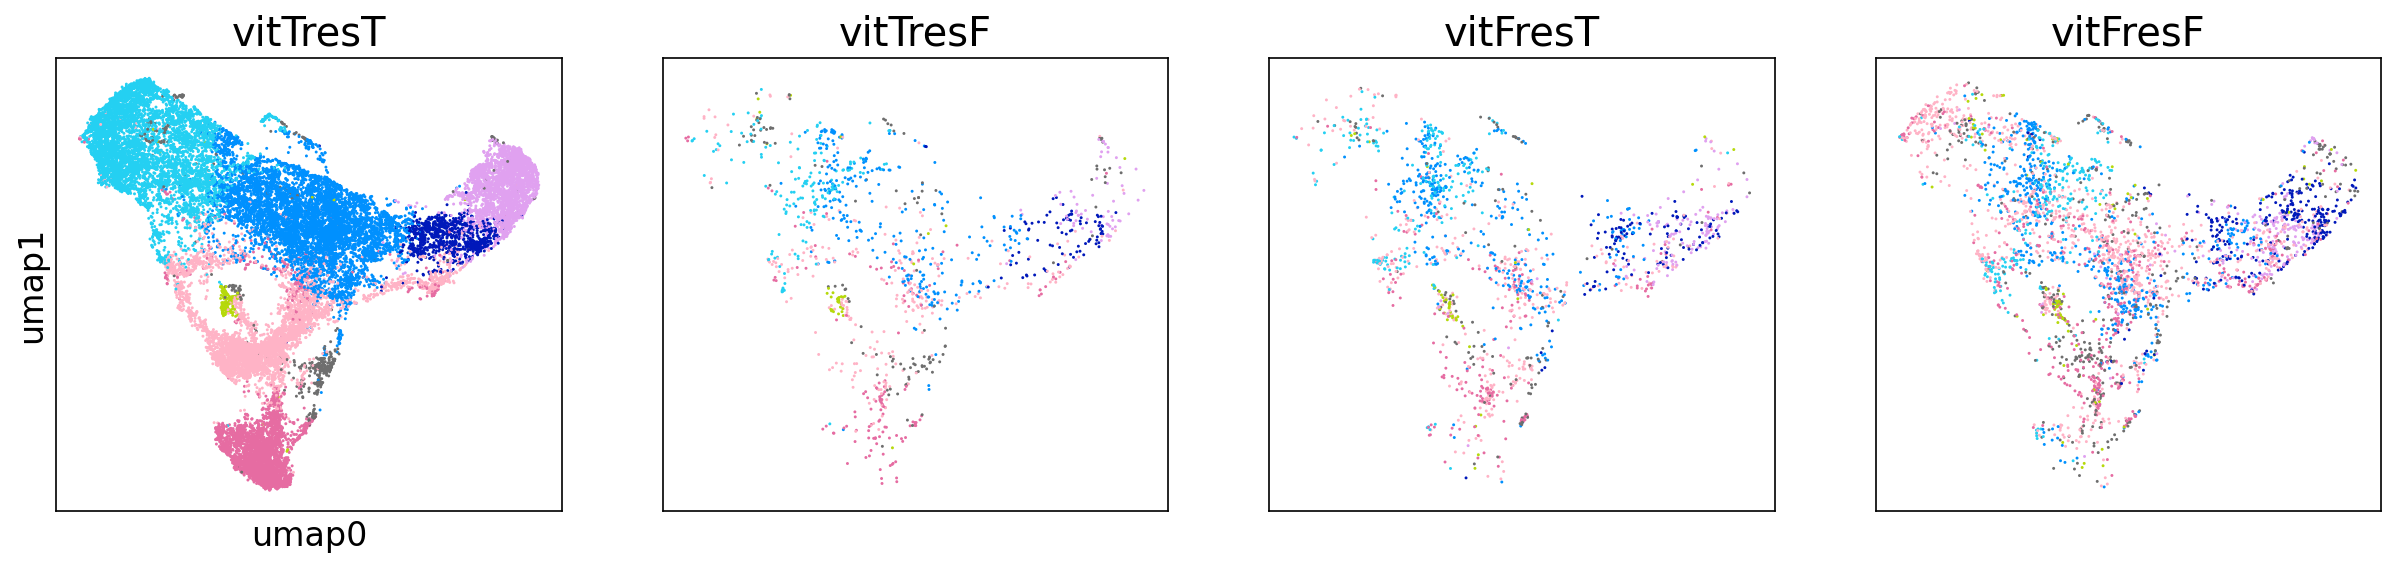

In [96]:
fig,axs=plt.subplots(1,4,figsize=(20,4),dpi=150,sharex=True,sharey=True)
hues=['vitTresT','vitTresF','vitFresT','vitFresF']
for n,types in enumerate(hues):
    data=vit_test[vit_test[types]==1]
    ax=axs[n]
    sns.scatterplot(x='umap0',y='umap1',data=data,
                    linewidth=0,s=2,hue='cluster',palette=colordic,ax=ax)
    ax.set_title(types)
    ax.legend([],[], frameon=False)
    ax.set_xticks([])
    ax.set_yticks([])

Text(0.5, 1.0, 'VIT predict')

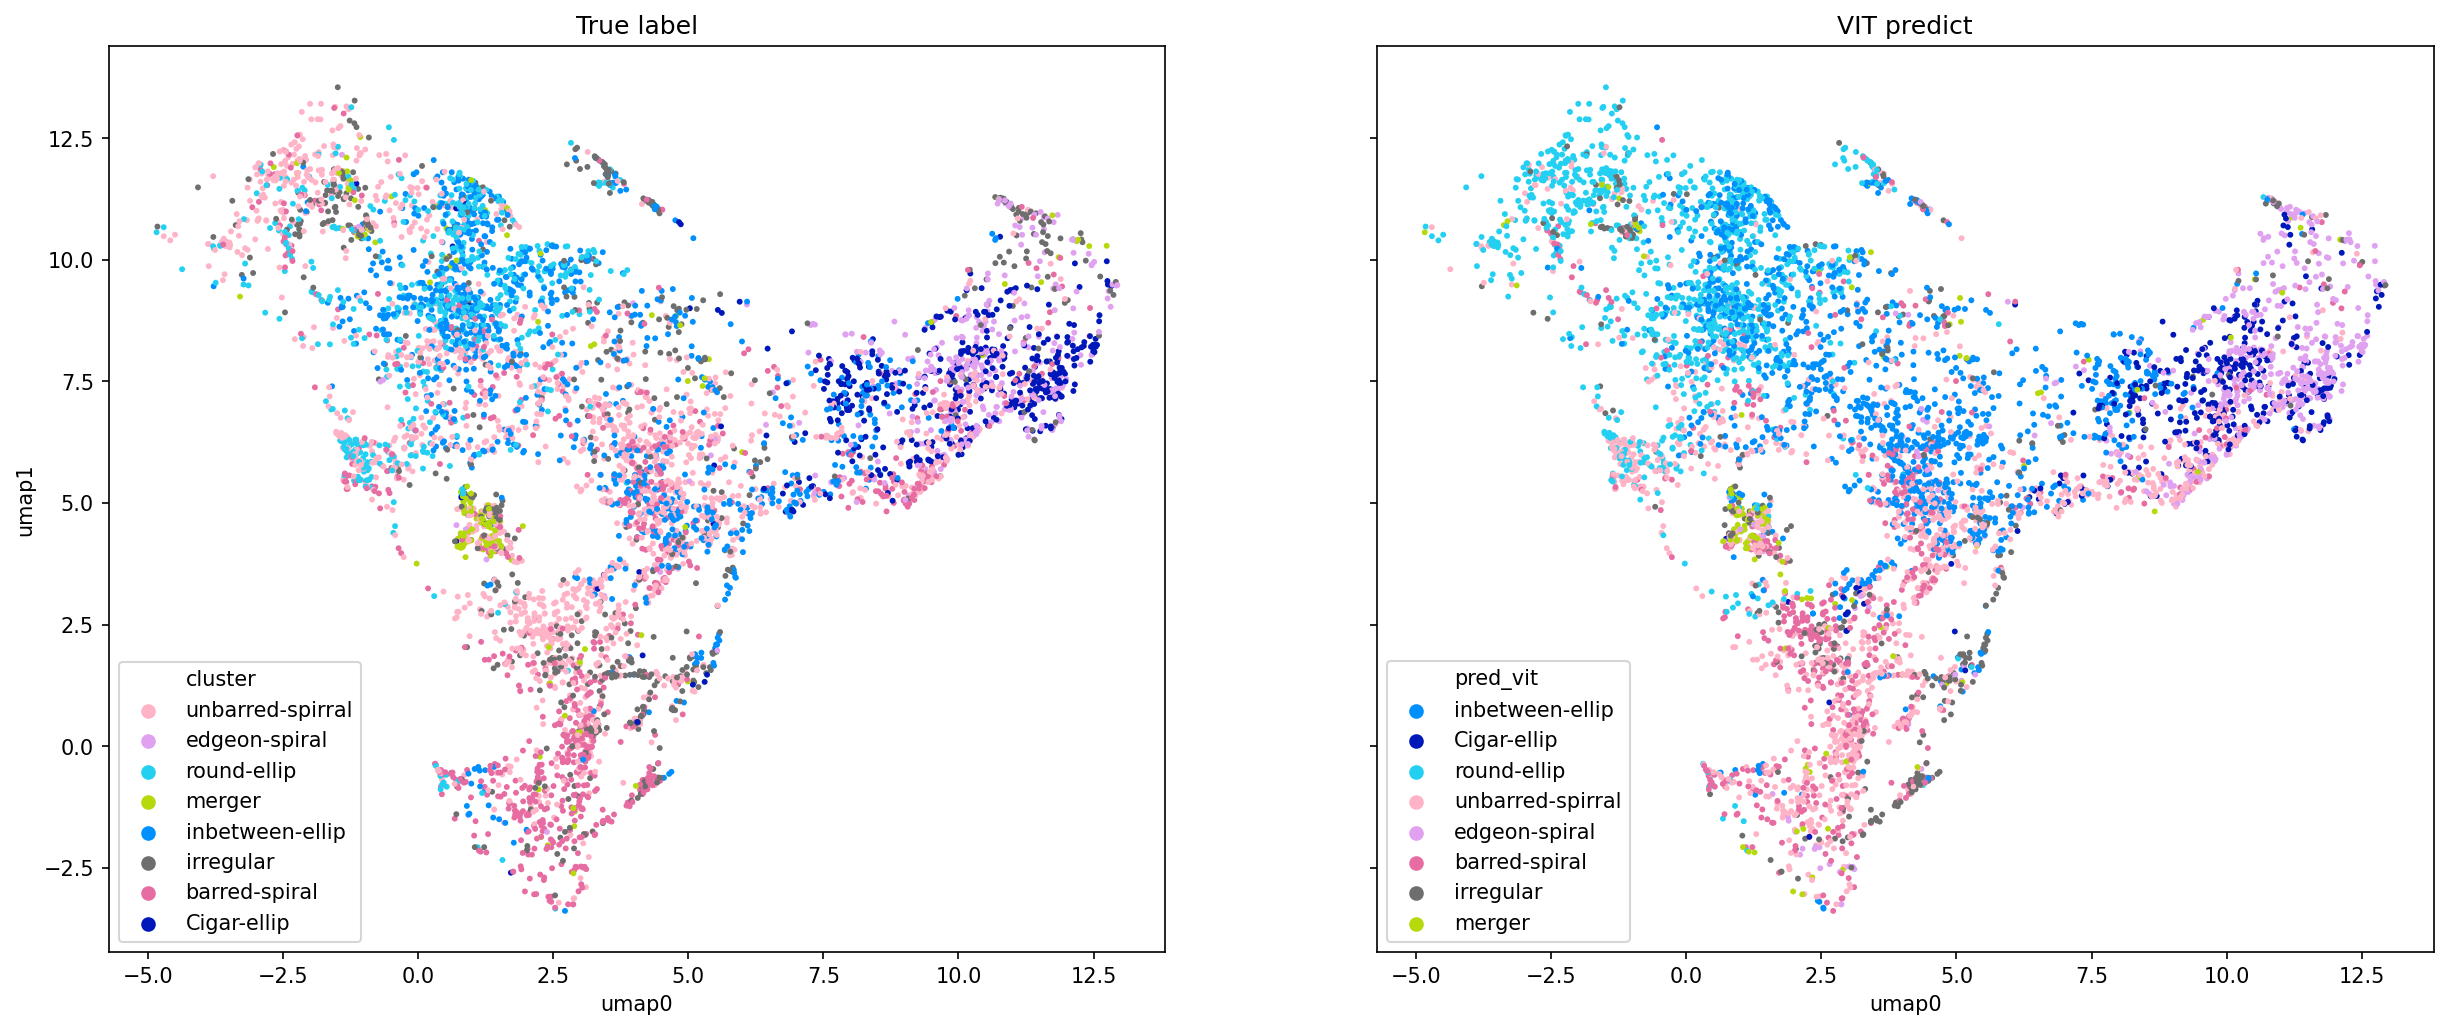

In [215]:
fig,axs=plt.subplots(1,2,figsize=(20,8),dpi=150,sharex=True,sharey=True)
data=vit_test[(vit_test['vitFresF']==1)|(vit_test['vitFresT']==1)]
ax=axs[0]
sns.scatterplot(x='umap0',y='umap1',data=data,
                    linewidth=0,s=8,hue='cluster',palette=colordic,ax=ax)
ax.set_title('True label')
ax=axs[1]
sns.scatterplot(x='umap0',y='umap1',data=data,
                    linewidth=0,s=8,hue=data['pred_vit'].map(typedic),palette=colordic,ax=ax)
ax.set_title('VIT predict')

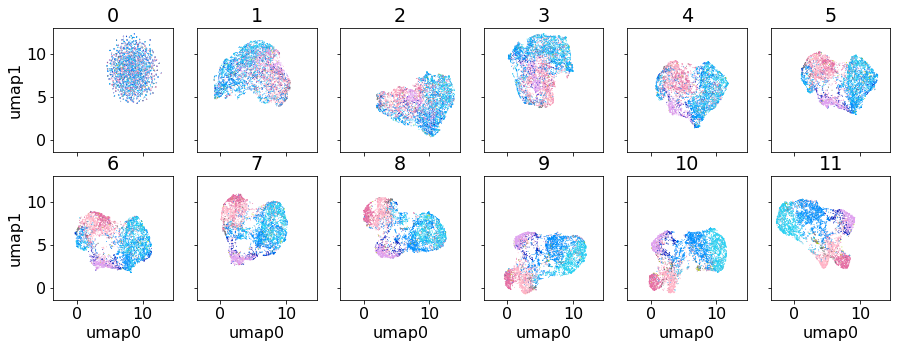

In [103]:
## umap for different layer
fig, axs = plt.subplots(2, 6, figsize=(15, 5),sharex=True,sharey=True)
for i in range(12):
    file=f"HiddenStates_Layer{i}.csv.gz"
    df=pd.read_csv(file,nrows=5000)
    data=df.drop(columns=['GalaxyID','y_true','y_pred']).values
    embedding = umap.UMAP(n_neighbors=10,n_components=2, metric='euclidean').fit_transform(data)
    info2=pd.DataFrame({'label': df['y_true'], 'umap0':embedding[:,0],'umap1':embedding[:,1]})
    info2['cluster']=info2['label'].map(typedic)
    ax=axs[i//6][i%6]
    sns.scatterplot(x='umap0',y='umap1',data=info2,hue='cluster',
                hue_order=hueorder,linewidth=0,s=0.8,palette=colordic,ax=ax)
    ax.legend([],[], frameon=False)
    ax.set_title(i)

# ResNet

In [97]:
# UMAP
# df=pd.read_csv('/cndd2/jchien/project/transformer/res_test_f2048.csv.gz')
# data=df.drop(columns=['galaxy_id','label']).values
# info=df[['galaxy_id','label']].merge(meta,left_on='galaxy_id',right_on='GalaxyID')
# info['cluster']=info['label'].map(typedic)
# embedding = umap.UMAP(n_neighbors=10,n_components=2, metric='euclidean').fit_transform(data)
# info['umap0']=embedding[:,0]
# info['umap1']=embedding[:,1]
# info.to_csv('UMAP_euclidean10_res_test_f2048.csv.gz')

Text(0.5, 1.0, 'res_test_f2048')

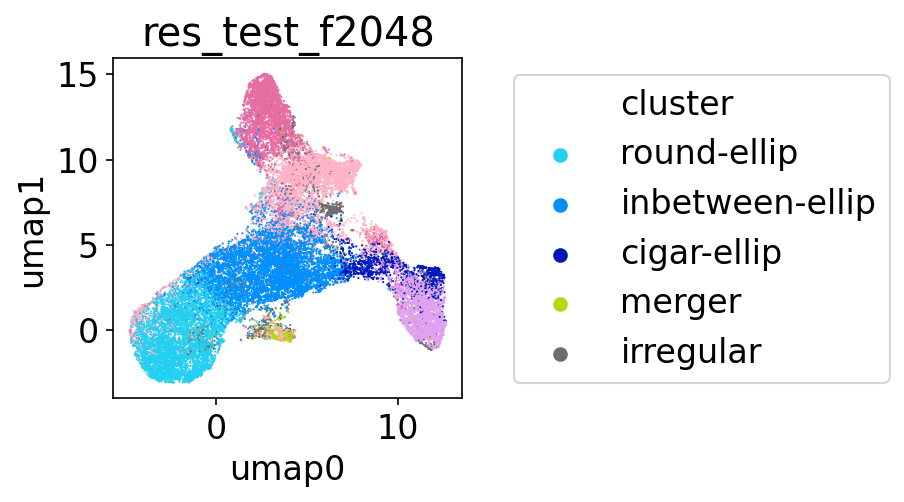

In [98]:
res_test=pd.read_csv('UMAP_euclidean10_res_test_f2048.csv.gz',index_col=0)
plt.figure(figsize=(3,3),dpi=150)
sns.scatterplot(x='umap0',y='umap1',data=res_test,hue='cluster',
                hue_order=hueorder,linewidth=0,s=1,palette=colordic)
plt.legend(bbox_to_anchor=(1.1,1))
# plt.axis('off')
plt.title('res_test_f2048')


<AxesSubplot:xlabel='umap0', ylabel='umap1'>

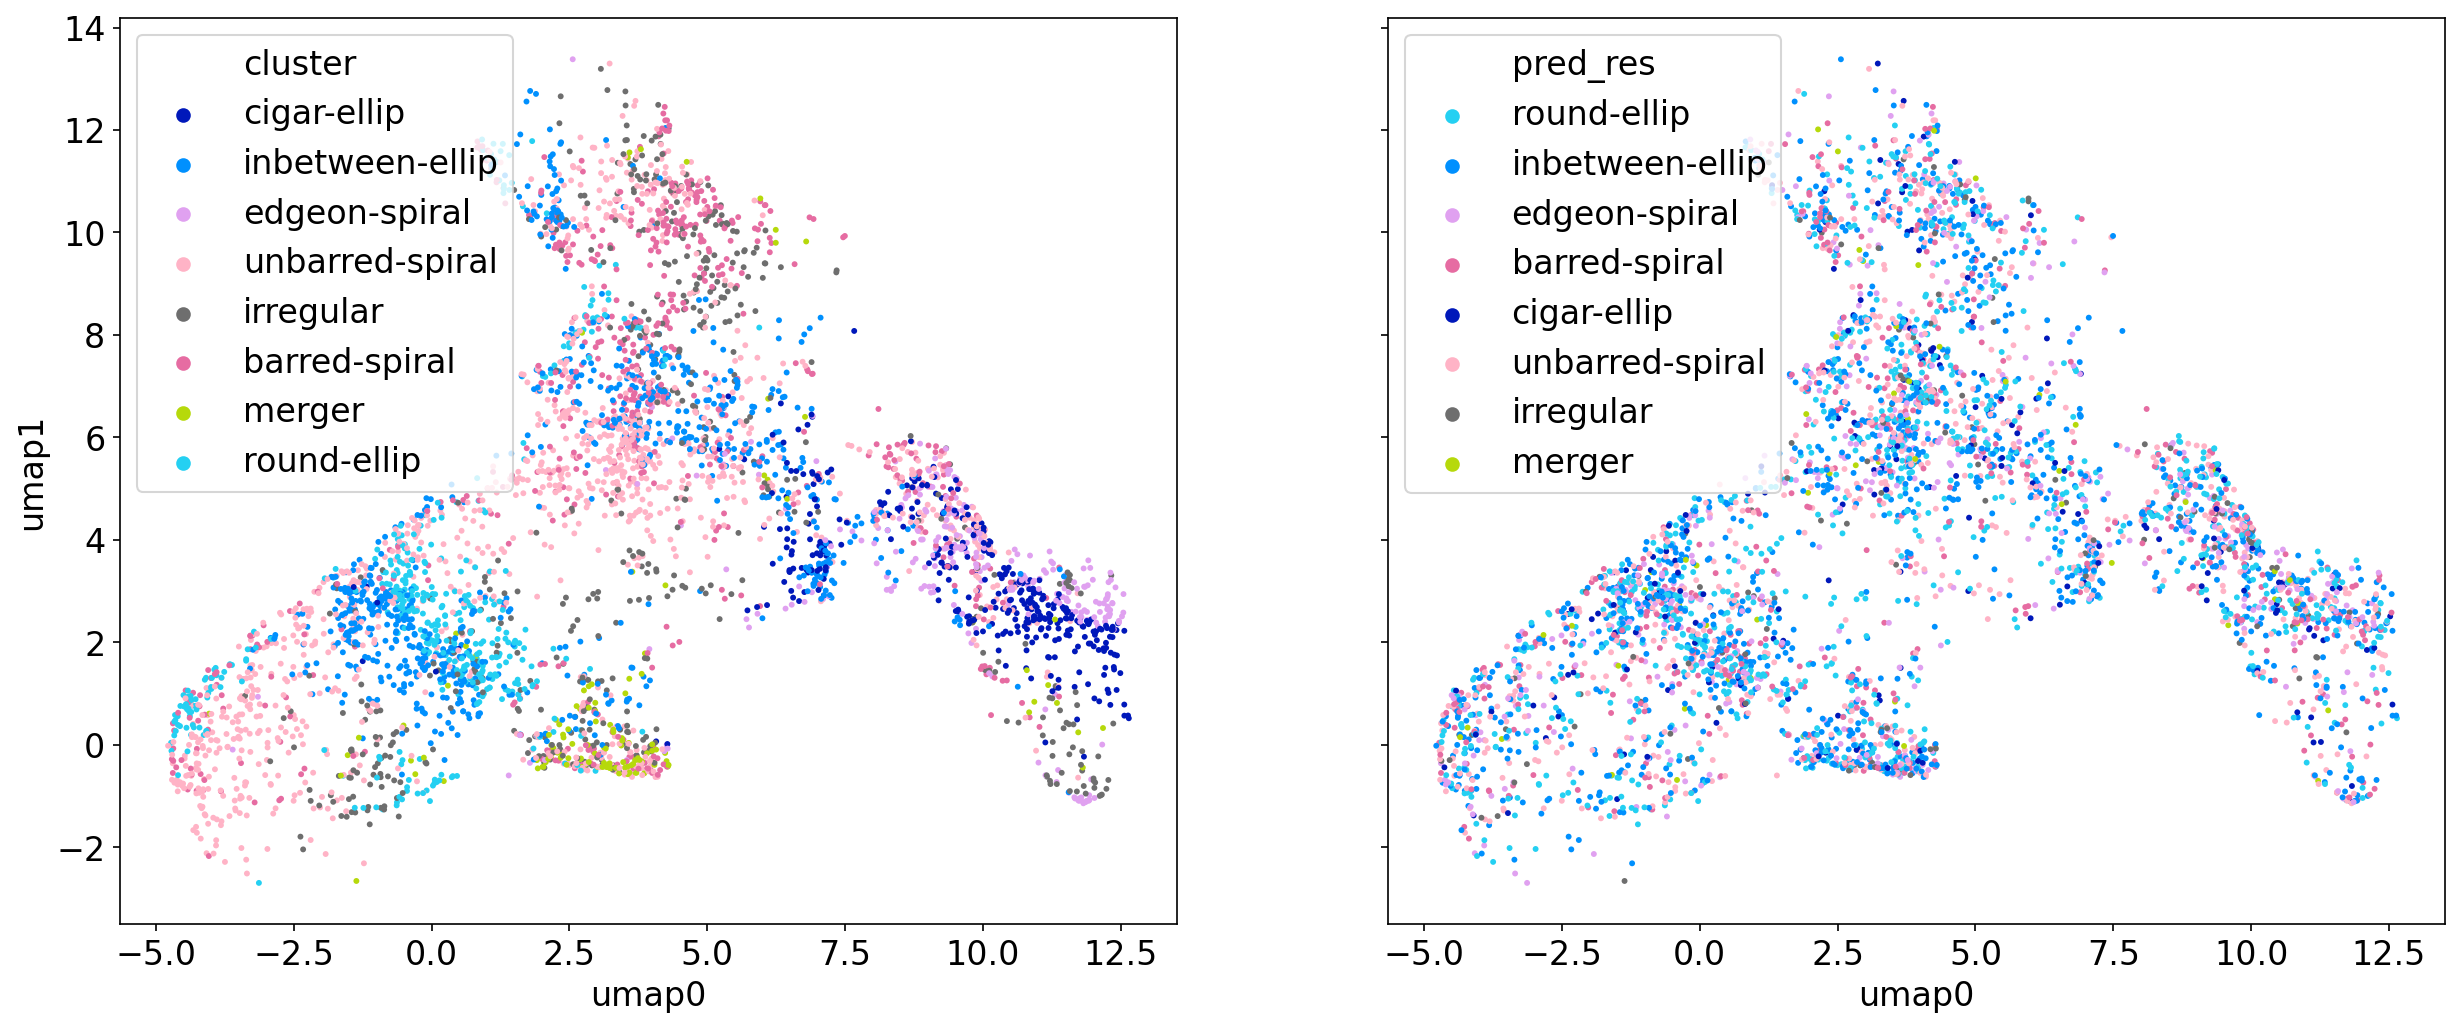

In [99]:
fig,axs=plt.subplots(1,2,figsize=(20,8),dpi=150,sharex=True,sharey=True)
data=res_test[(res_test['vitTresF']==1)|(res_test['vitFresF']==1)]
ax=axs[0]
sns.scatterplot(x='umap0',y='umap1',data=data,
                    linewidth=0,s=8,hue='cluster',palette=colordic,ax=ax)
ax=axs[1]
sns.scatterplot(x='umap0',y='umap1',data=data,
                    linewidth=0,s=8,hue=info['pred_res'].map(typedic),palette=colordic,ax=ax)

# extract galaxy image

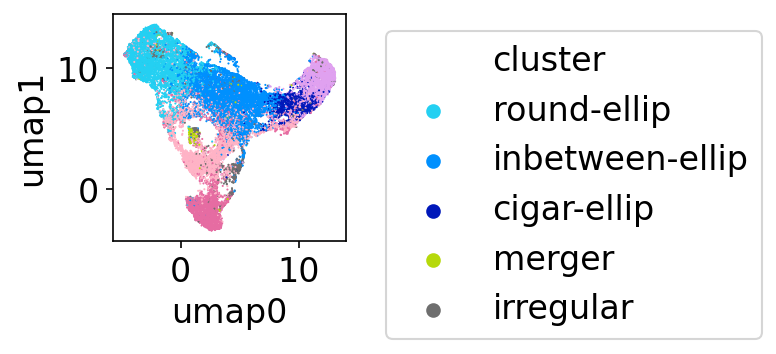

In [100]:
vit_test=pd.read_csv('UMAP_euclidean10_vit_base_test_f768.csv.gz',index_col=0)
plt.figure(figsize=(2,2),dpi=150)
sns.scatterplot(x='umap0',y='umap1',data=vit_test,hue='cluster',
                hue_order=hueorder,linewidth=0,s=1,palette=colordic)
plt.legend(bbox_to_anchor=(1.1,1))

Text(0.5, 0.98, 'unbarred-spirral')

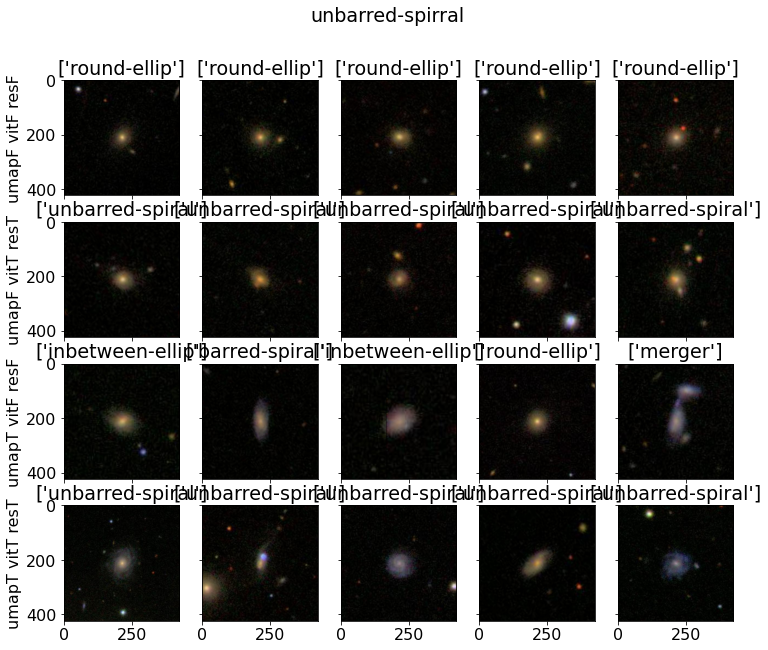

In [101]:
dir_image = '/cndd2/jchien/project/transformer/images'
fig, axes = plt.subplots(4, 5, figsize=(12, 10),sharex=True,sharey=True)
# plt.subplots_adjust(hspace=0.0001, wspace=0.001)
sf=vit_test[(vit_test['cluster']=='unbarred-spiral')&(vit_test['vitFresF']==1)&(vit_test['umap0']<5)&(vit_test['umap1']>10)]['galaxy_id'].sample(5).values
st=vit_test[(vit_test['cluster']=='unbarred-spiral')&(vit_test['vitTresT']==1)&(vit_test['umap0']<5)&(vit_test['umap1']>10)]['galaxy_id'].sample(5).values
rf=vit_test[(vit_test['cluster']=='unbarred-spiral')&(vit_test['vitFresF']==1)&(vit_test['umap1']<5)&(vit_test['umap1']>0)]['galaxy_id'].sample(5).values
rt=vit_test[(vit_test['cluster']=='unbarred-spiral')&(vit_test['vitTresT']==1)&(vit_test['umap1']<5)&(vit_test['umap1']>0)]['galaxy_id'].sample(5).values

for j in range(4):
    for i in range(5):
        if j==0:
            galID = sf[i]
        elif j==1:
            galID = st[i]
        elif j==2:
            galID = rf[i]
        else:
            galID = rt[i]
        IMG = plt.imread(dir_image+f'/{galID}.jpg')
        axes[j,i].imshow(IMG)
        pred=vit_test[vit_test['galaxy_id']==galID]['pred_vit'].map(typedic).values
        axes[j,i].set_title(pred)
#         axes[j,i].axis('off')
plt.setp(axes[0, 0], ylabel='umapF vitF resF')
plt.setp(axes[1, 0], ylabel='umapF vitT resT')
plt.setp(axes[2, 0], ylabel='umapT vitF resF')
plt.setp(axes[3, 0], ylabel='umapT vitT resT')
plt.suptitle('unbarred-spirral')

Text(0.5, 0.98, 'barred-spirral')

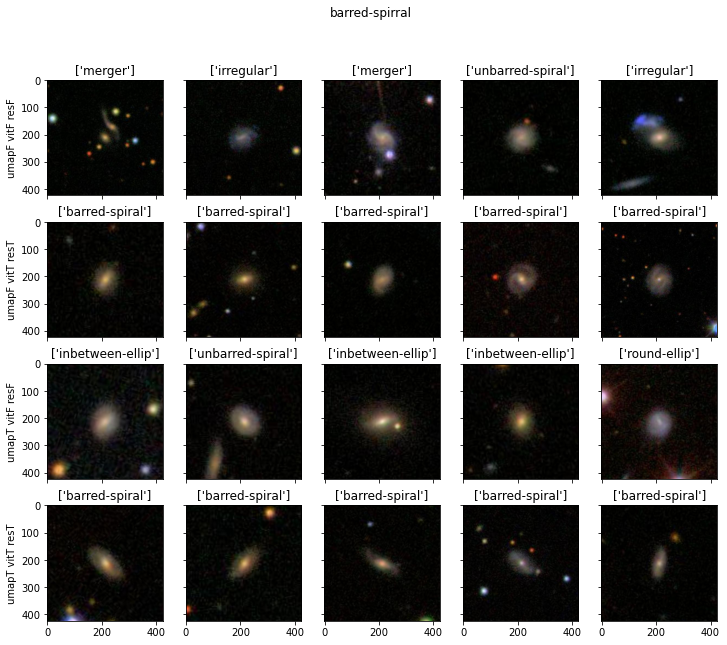

In [249]:
dir_image = '/cndd2/jchien/project/transformer/images'
fig, axes = plt.subplots(4, 5, figsize=(12, 10),sharex=True,sharey=True)

sf=vit_test[(vit_test['cluster']=='barred-spiral')&(vit_test['vitFresF']==1)&(vit_test['umap1']<1)]['galaxy_id'].sample(5).values
st=vit_test[(vit_test['cluster']=='barred-spiral')&(vit_test['vitTresT']==1)&(vit_test['umap1']<1)]['galaxy_id'].sample(5).values
rf=vit_test[(vit_test['cluster']=='barred-spiral')&(vit_test['vitFresF']==1)&(vit_test['umap1']>2)]['galaxy_id'].sample(5).values
rt=vit_test[(vit_test['cluster']=='barred-spiral')&(vit_test['vitTresT']==1)&(vit_test['umap1']>2)]['galaxy_id'].sample(5).values

for j in range(4):
    for i in range(5):
        if j==0:
            galID = sf[i]
        elif j==1:
            galID = st[i]
        elif j==2:
            galID = rf[i]
        else:
            galID = rt[i]
        IMG = plt.imread(dir_image+f'/{galID}.jpg')
        axes[j,i].imshow(IMG)
        pred=vit_test[vit_test['galaxy_id']==galID]['pred_vit'].map(typedic).values
        axes[j,i].set_title(pred)
plt.setp(axes[0, 0], ylabel='umapF vitF resF')
plt.setp(axes[1, 0], ylabel='umapF vitT resT')
plt.setp(axes[2, 0], ylabel='umapT vitF resF')
plt.setp(axes[3, 0], ylabel='umapT vitT resT')
plt.suptitle('barred-spirral')

Text(0.5, 0.98, 'vitTresF')

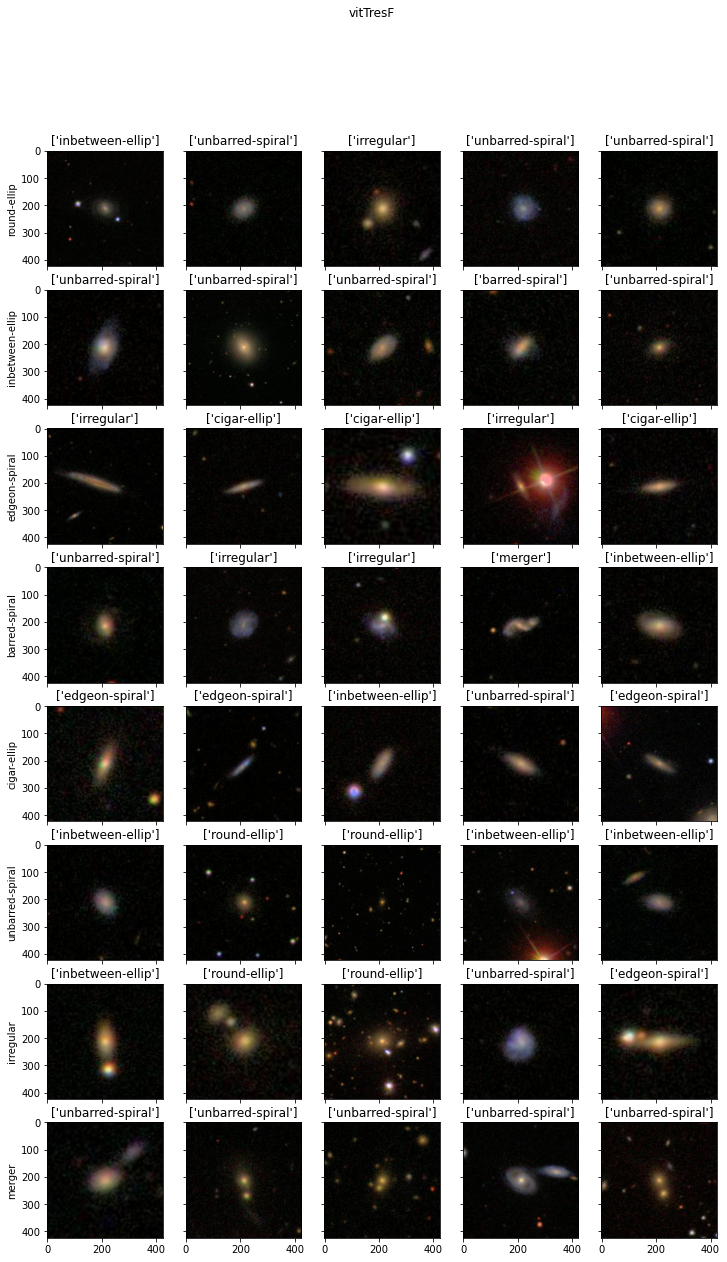

In [65]:
dir_image = '/cndd2/jchien/project/transformer/images'
fig, axes = plt.subplots(8, 5, figsize=(12, 20),sharex=True,sharey=True)
# plt.subplots_adjust(hspace=0.0001, wspace=0.001)

vit_test_sub=vit_test[vit_test['vitTresF']==1]
for j,typp in enumerate(vit_test['cluster'].unique()): 
    tmp=vit_test_sub[vit_test_sub['cluster']==typp]['galaxy_id'].sample(5).values
    for i,imgg in enumerate(tmp): 
        IMG = plt.imread(dir_image+f'/{imgg}.jpg')
        axes[j,i].imshow(IMG)
        pred=vit_test[vit_test['galaxy_id']==imgg]['pred_res'].map(typedic).values
        axes[j,i].set_title(pred)
# #         axes[j,i].axis('off')
        plt.setp(axes[j, 0], ylabel=typp)

plt.suptitle('vitTresF')